In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

file = "GamingStudy_dataKaggle.csv"

dataset = pd.read_csv(file, encoding="ISO-8859-1")

In [2]:
gender_df = dataset[["S. No.", "Game", "Platform", "Hours", "earnings", "whyplay", "streams", "Gender", "Age", "Work",
"Degree", "Birthplace", "Residence", "Playstyle","Narcissism", "GAD_T", "SWL_T", "SPIN_T"]]
gender_df

,S. No.,Game,Platform,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,Narcissism,GAD_T,SWL_T,SPIN_T
0,1,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Singleplayer,1.0,1,23,5.0
1,2,Other,PC,8.0,I play for fun,having fun,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Multiplayer - online - with strangers,1.0,8,16,33.0
2,3,Other,PC,0.0,I play for fun,having fun,0.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Singleplayer,4.0,8,17,31.0
3,4,Other,PC,20.0,I play for fun,improving,5.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,2.0,0,17,11.0
4,5,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Multiplayer - online - with strangers,1.0,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,Other,"Console (PS, Xbox, ...)",40.0,I play for fun,improving,10.0,Male,22,Student at college / university,Master (or equivalent),France,France,Multiplayer - online - with strangers,3.0,4,28,7.0
13460,14247,League of Legends,PC,20.0,I play for fun,winning,20.0,Female,20,Student at college / university,High school diploma (or equivalent),USA,USA,Multiplayer - online - with strangers,2.0,20,23,25.0
13461,14248,Starcraft 2,PC,20.0,I play for fun,having fun,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Norway,Multiplayer - online - with real life friends,2.0,0,32,10.0
13462,14249,Other,"Console (PS, Xbox, ...)",5.0,I play for fun,having fun,0.0,Female,18,Student at school,High school diploma (or equivalent),Canada,Canada,Singleplayer,2.0,13,16,32.0


In [3]:
totalCount = len(gender_df['Gender'])
totalGenderCount = gender_df['Gender'].value_counts()
totalMaleCount = len(gender_df.loc[gender_df['Gender'] == "Male"])
totalFemaleCount = len(gender_df.loc[gender_df['Gender'] == "Female"])
totalOtherCount = len(gender_df.loc[gender_df['Gender'] == "Other"])

In [4]:
male_df = gender_df.loc[gender_df['Gender'] == "Male"]
female_df = gender_df.loc[gender_df['Gender'] == "Female"]
other_df = gender_df.loc[gender_df['Gender'] == "Other"]

In [5]:
maleCountry = male_df['Residence'].value_counts().nlargest(5)
femaleCountry = female_df['Residence'].value_counts().nlargest(5)
otherCountry = other_df['Residence'].value_counts().nlargest(5)
print("Male Countries:") 
print(maleCountry)
print("------------")
print("Female Countries:") 
print(femaleCountry)
print("------------")
# print("Other Countries:") 
# print(otherCountry)
# print("------------")

Male Countries:
USA            4241
Germany        1358
UK              964
Canada          925
Netherlands     487
Name: Residence, dtype: int64
------------
Female Countries:
USA        306
Canada      65
UK          62
Germany     53
Poland      19
Name: Residence, dtype: int64
------------


In [6]:
GAD_df = gender_df.loc[gender_df['GAD_T'] > 9]
SWL_df = gender_df.loc[gender_df['SWL_T'] < 20]
SPIN_df = gender_df.loc[gender_df['SPIN_T'] > 19]

GAD_Count = len(GAD_df['S. No.'])
G_Percent = round(GAD_Count / totalCount * 100,2)
SWL_Count = len(SWL_df['S. No.'])
SW_Percent = round(SWL_Count / totalCount * 100,2)
SPIN_Count = len(SPIN_df['S. No.'])
SP_Percent = round(SPIN_Count / totalCount * 100,2)

print(f"Total GAD Count: {GAD_Count} ({G_Percent}%)")
print(f"Total SWL Count: {SWL_Count} ({SW_Percent}%)")
print(f"Total SPIN Count: {SPIN_Count} ({SP_Percent}%)")

Total GAD Count: 2352 (17.47%)
Total SWL Count: 6484 (48.16%)
Total SPIN Count: 5576 (41.41%)


In [7]:
mGAD_df = male_df.loc[male_df['GAD_T'] > 9]
mSWL_df = male_df.loc[male_df['SWL_T'] < 20]
mSPIN_df = male_df.loc[male_df['SPIN_T'] > 19]

mGAD_Count = len(mGAD_df['S. No.'])
mG_Percent = round(mGAD_Count / totalMaleCount * 100,2)
mSWL_Count = len(mSWL_df['S. No.'])
mSW_Percent = round(mSWL_Count / totalMaleCount * 100,2)
mSPIN_Count = len(mSPIN_df['S. No.'])
mSP_Percent = round(mSPIN_Count / totalMaleCount * 100,2)

print(f"Total GAD Count: {mGAD_Count} ({mG_Percent}%)")
print(f"Total SWL Count: {mSWL_Count} ({mSW_Percent}%)")
print(f"Total SPIN Count: {mSPIN_Count} ({mSP_Percent}%)")

Total GAD Count: 2085 (16.42%)
Total SWL Count: 6068 (47.78%)
Total SPIN Count: 5086 (40.05%)


In [8]:
fGAD_df = female_df.loc[female_df['GAD_T'] > 9]
fSWL_df = female_df.loc[female_df['SWL_T'] < 20]
fSPIN_df = female_df.loc[female_df['SPIN_T'] > 19]

fGAD_Count = len(fGAD_df['S. No.'])
fG_Percent = round(fGAD_Count / totalFemaleCount * 100,2)
fSWL_Count = len(fSWL_df['S. No.'])
fSW_Percent = round(fSWL_Count / totalFemaleCount * 100,2)
fSPIN_Count = len(fSPIN_df['S. No.'])
fSP_Percent = round(fSPIN_Count / totalFemaleCount * 100,2)

print(f"Total GAD Count: {fGAD_Count} ({fG_Percent}%)")
print(f"Total SWL Count: {fSWL_Count} ({fSW_Percent}%)")
print(f"Total SPIN Count: {fSPIN_Count} ({fSP_Percent}%)")

Total GAD Count: 243 (34.08%)
Total SWL Count: 379 (53.16%)
Total SPIN Count: 457 (64.1%)


In [9]:
oGAD_df = other_df.loc[other_df['GAD_T'] > 9]
oSWL_df = other_df.loc[other_df['SWL_T'] < 20]
oSPIN_df = other_df.loc[other_df['SPIN_T'] > 19]

oGAD_Count = len(oGAD_df['S. No.'])
oG_Percent = round(oGAD_Count / totalOtherCount * 100,2)
oSWL_Count = len(oSWL_df['S. No.'])
oSW_Percent = round(oSWL_Count / totalOtherCount * 100,2)
oSPIN_Count = len(oSPIN_df['S. No.'])
oSP_Percent = round(oSPIN_Count / totalOtherCount * 100,2)

print(f"Total GAD Count: {oGAD_Count} ({oG_Percent}%)")
print(f"Total SWL Count: {oSWL_Count} ({oSW_Percent}%)")
print(f"Total SPIN Count: {oSPIN_Count} ({oSP_Percent}%)")

Total GAD Count: 24 (46.15%)
Total SWL Count: 37 (71.15%)
Total SPIN Count: 33 (63.46%)


In [10]:
breakdown = [["Male", totalMaleCount, mG_Percent, mSW_Percent, mSP_Percent], ["Female", totalFemaleCount, fG_Percent, fSW_Percent, fSP_Percent], ["Other", totalOtherCount, oG_Percent, oSW_Percent, oSP_Percent]]
columns = ['Gender', 'Count', 'GAD %', 'SWL %', 'SPIN %']
display_df = pd.DataFrame(breakdown, columns = columns)
display_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,12699,16.42,47.78,40.05
1,Female,713,34.08,53.16,64.10
2,Other,52,46.15,71.15,63.46


In [11]:
gender_df['Playstyle'].value_counts()

Multiplayer - online - with real life friends                                                                5564
Multiplayer - online - with strangers                                                                        4134
Multiplayer - online - with online acquaintances or teammates                                                2652
Singleplayer                                                                                                  762
Multiplayer - offline (people in the same room)                                                                48
                                                                                                             ... 
with friends or online acquintances vs strangers                                                                1
Fifa with friends in room (ps4), LoL online with strangers tryhard ranked, CSGO competetive with friends.       1
Multiplayer - online - both RL friends and strangers                                    

In [12]:
singlep_df = gender_df.loc[gender_df['Playstyle'] == "Singleplayer"]
multip_irl_df = gender_df.loc[gender_df['Playstyle'] == "Multiplayer - online - with real life friends"]
multip_str_df = gender_df.loc[gender_df['Playstyle'] == "Multiplayer - online - with strangers"]
multip_onl_df = gender_df.loc[gender_df['Playstyle'] == "Multiplayer - online - with online acquaintances or teammates"]

In [13]:
singlepCount = len(singlep_df['S. No.'])
multipirlCount = len(multip_irl_df['S. No.'])
multipstrCount = len(multip_str_df['S. No.'])
multiponlCount = len(multip_onl_df['S. No.'])
otherCount = totalCount - singlepCount - multipirlCount - multipstrCount - multiponlCount
print("-----------")
print(f"Singleplayer: {singlepCount}")
print("-----------")
print(f"Multiplayer w/ irl friends: {multipirlCount}")
print("-----------")
print(f"Multiplayer w/ strangers: {multipstrCount}")
print("-----------")
print(f"Multiplayer w/ online friends: {multiponlCount}")
print("-----------")
print(f"Other: {otherCount}")
print("-----------")

-----------
Singleplayer: 762
-----------
Multiplayer w/ irl friends: 5564
-----------
Multiplayer w/ strangers: 4134
-----------
Multiplayer w/ online friends: 2652
-----------
Other: 352
-----------


In [14]:
#Singleplayer dataframes
smale_df = singlep_df.loc[singlep_df['Gender'] == "Male"]
stotalMaleCount = len(smale_df['S. No.'])
sfemale_df = singlep_df.loc[singlep_df['Gender'] == "Female"]
stotalFemaleCount = len(sfemale_df['S. No.'])
sother_df = singlep_df.loc[singlep_df['Gender'] == "Other"]
stotalOtherCount = len(sother_df['S. No.'])
#Multiplayer w/ irl friends dataframes
mimale_df = multip_irl_df.loc[multip_irl_df['Gender'] == "Male"]
mitotalMaleCount = len(mimale_df['S. No.'])
mifemale_df = multip_irl_df.loc[multip_irl_df['Gender'] == "Female"]
mitotalFemaleCount = len(mifemale_df['S. No.'])
miother_df = multip_irl_df.loc[multip_irl_df['Gender'] == "Other"]
mitotalOtherCount = len(miother_df['S. No.'])
#Multiplayer w/ strangers dataframes
msmale_df = multip_str_df.loc[multip_str_df['Gender'] == "Male"]
mstotalMaleCount = len(msmale_df['S. No.'])
msfemale_df = multip_str_df.loc[multip_str_df['Gender'] == "Female"]
mstotalFemaleCount = len(msfemale_df['S. No.'])
msother_df = multip_str_df.loc[multip_str_df['Gender'] == "Other"]
mstotalOtherCount = len(msother_df['S. No.'])
#Multiplayer w/ online friends dataframes
momale_df = multip_onl_df.loc[multip_onl_df['Gender'] == "Male"]
mototalMaleCount = len(momale_df['S. No.'])
mofemale_df = multip_onl_df.loc[multip_onl_df['Gender'] == "Female"]
mototalFemaleCount = len(mofemale_df['S. No.'])
moother_df = multip_onl_df.loc[multip_onl_df['Gender'] == "Other"]
mototalOtherCount = len(moother_df['S. No.'])

In [15]:
#Singleplayer

sGAD_df = singlep_df.loc[singlep_df['GAD_T'] > 9]
sSWL_df = singlep_df.loc[singlep_df['SWL_T'] < 20]
sSPIN_df = singlep_df.loc[singlep_df['SPIN_T'] > 19]

sGAD_Count = len(sGAD_df['S. No.'])
sG_Percent = round(sGAD_Count / singlepCount * 100,2)
sSWL_Count = len(sSWL_df['S. No.'])
sSW_Percent = round(sSWL_Count / singlepCount * 100,2)
sSPIN_Count = len(sSPIN_df['S. No.'])
sSP_Percent = round(sSPIN_Count / singlepCount * 100,2)

smGAD_df = smale_df.loc[smale_df['GAD_T'] > 9]
smSWL_df = smale_df.loc[smale_df['SWL_T'] < 20]
smSPIN_df = smale_df.loc[smale_df['SPIN_T'] > 19]

smGAD_Count = len(smGAD_df['S. No.'])
smG_Percent = round(smGAD_Count / stotalMaleCount * 100,2)
smSWL_Count = len(smSWL_df['S. No.'])
smSW_Percent = round(smSWL_Count / stotalMaleCount * 100,2)
smSPIN_Count = len(smSPIN_df['S. No.'])
smSP_Percent = round(smSPIN_Count / stotalMaleCount * 100,2)

sfGAD_df = sfemale_df.loc[sfemale_df['GAD_T'] > 9]
sfSWL_df = sfemale_df.loc[sfemale_df['SWL_T'] < 20]
sfSPIN_df = sfemale_df.loc[sfemale_df['SPIN_T'] > 19]

sfGAD_Count = len(sfGAD_df['S. No.'])
sfG_Percent = round(sfGAD_Count / stotalFemaleCount * 100,2)
sfSWL_Count = len(sfSWL_df['S. No.'])
sfSW_Percent = round(sfSWL_Count / stotalFemaleCount * 100,2)
sfSPIN_Count = len(sfSPIN_df['S. No.'])
sfSP_Percent = round(sfSPIN_Count / stotalFemaleCount * 100,2)

soGAD_df = sother_df.loc[sother_df['GAD_T'] > 9]
soSWL_df = sother_df.loc[sother_df['SWL_T'] < 20]
soSPIN_df = sother_df.loc[sother_df['SPIN_T'] > 19]

soGAD_Count = len(soGAD_df['S. No.'])
soG_Percent = round(soGAD_Count / stotalOtherCount * 100,2)
soSWL_Count = len(soSWL_df['S. No.'])
soSW_Percent = round(soSWL_Count / stotalOtherCount * 100,2)
soSPIN_Count = len(soSPIN_df['S. No.'])
soSP_Percent = round(soSPIN_Count / stotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {sGAD_Count} ({sG_Percent}%)")
print(f"Total SWL Count: {sSWL_Count} ({sSW_Percent}%)")
print(f"Total SPIN Count: {sSPIN_Count} ({sSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {smGAD_Count} ({smG_Percent}%)")
print(f"Male Total SWL Count: {smSWL_Count} ({smSW_Percent}%)")
print(f"Male Total SPIN Count: {smSPIN_Count} ({smSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {sfGAD_Count} ({sfG_Percent}%)")
print(f"Female Total SWL Count: {sfSWL_Count} ({sfSW_Percent}%)")
print(f"Female Total SPIN Count: {sfSPIN_Count} ({sfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {soGAD_Count} ({soG_Percent}%)")
print(f"Total SWL Count: {soSWL_Count} ({soSW_Percent}%)")
print(f"Total SPIN Count: {soSPIN_Count} ({soSP_Percent}%)")

----------
Total GAD Count: 163 (21.39%)
Total SWL Count: 432 (56.69%)
Total SPIN Count: 381 (50.0%)
----------
Male Total GAD Count: 139 (20.38%)
Male Total SWL Count: 387 (56.74%)
Male Total SPIN Count: 328 (48.09%)
----------
Female Total GAD Count: 24 (32.0%)
Female Total SWL Count: 41 (54.67%)
Female Total SPIN Count: 49 (65.33%)
----------
Total GAD Count: 0 (0.0%)
Total SWL Count: 4 (80.0%)
Total SPIN Count: 4 (80.0%)


In [16]:
#Multiplayer w/ irl friends

miGAD_df = multip_irl_df.loc[multip_irl_df['GAD_T'] > 9]
miSWL_df = multip_irl_df.loc[multip_irl_df['SWL_T'] < 20]
miSPIN_df = multip_irl_df.loc[multip_irl_df['SPIN_T'] > 19]

miGAD_Count = len(miGAD_df['S. No.'])
miG_Percent = round(miGAD_Count / multipirlCount * 100,2)
miSWL_Count = len(miSWL_df['S. No.'])
miSW_Percent = round(miSWL_Count / multipirlCount * 100,2)
miSPIN_Count = len(miSPIN_df['S. No.'])
miSP_Percent = round(miSPIN_Count / multipirlCount * 100,2)

mimGAD_df = mimale_df.loc[mimale_df['GAD_T'] > 9]
mimSWL_df = mimale_df.loc[mimale_df['SWL_T'] < 20]
mimSPIN_df = mimale_df.loc[mimale_df['SPIN_T'] > 19]

mimGAD_Count = len(mimGAD_df['S. No.'])
mimG_Percent = round(mimGAD_Count / mitotalMaleCount * 100,2)
mimSWL_Count = len(mimSWL_df['S. No.'])
mimSW_Percent = round(mimSWL_Count / mitotalMaleCount * 100,2)
mimSPIN_Count = len(mimSPIN_df['S. No.'])
mimSP_Percent = round(mimSPIN_Count / mitotalMaleCount * 100,2)

mifGAD_df = mifemale_df.loc[mifemale_df['GAD_T'] > 9]
mifSWL_df = mifemale_df.loc[mifemale_df['SWL_T'] < 20]
mifSPIN_df = mifemale_df.loc[mifemale_df['SPIN_T'] > 19]

mifGAD_Count = len(mifGAD_df['S. No.'])
mifG_Percent = round(mifGAD_Count / mitotalFemaleCount * 100,2)
mifSWL_Count = len(mifSWL_df['S. No.'])
mifSW_Percent = round(mifSWL_Count / mitotalFemaleCount * 100,2)
mifSPIN_Count = len(mifSPIN_df['S. No.'])
mifSP_Percent = round(mifSPIN_Count / mitotalFemaleCount * 100,2)

mioGAD_df = miother_df.loc[miother_df['GAD_T'] > 9]
mioSWL_df = miother_df.loc[miother_df['SWL_T'] < 20]
mioSPIN_df = miother_df.loc[miother_df['SPIN_T'] > 19]

mioGAD_Count = len(mioGAD_df['S. No.'])
mioG_Percent = round(mioGAD_Count / mitotalOtherCount * 100,2)
mioSWL_Count = len(mioSWL_df['S. No.'])
mioSW_Percent = round(mioSWL_Count / mitotalOtherCount * 100,2)
mioSPIN_Count = len(mioSPIN_df['S. No.'])
mioSP_Percent = round(mioSPIN_Count / mitotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {miGAD_Count} ({miG_Percent}%)")
print(f"Total SWL Count: {miSWL_Count} ({miSW_Percent}%)")
print(f"Total SPIN Count: {miSPIN_Count} ({miSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {mimGAD_Count} ({mimG_Percent}%)")
print(f"Male Total SWL Count: {mimSWL_Count} ({mimSW_Percent}%)")
print(f"Male Total SPIN Count: {mimSPIN_Count} ({mimSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {mifGAD_Count} ({mifG_Percent}%)")
print(f"Female Total SWL Count: {mifSWL_Count} ({mifSW_Percent}%)")
print(f"Female Total SPIN Count: {mifSPIN_Count} ({mifSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {mioGAD_Count} ({mioG_Percent}%)")
print(f"Total SWL Count: {mioSWL_Count} ({mioSW_Percent}%)")
print(f"Total SPIN Count: {mioSPIN_Count} ({mioSP_Percent}%)")

----------
Total GAD Count: 807 (14.5%)
Total SWL Count: 2330 (41.88%)
Total SPIN Count: 2177 (39.13%)
----------
Male Total GAD Count: 737 (13.81%)
Male Total SWL Count: 2235 (41.88%)
Male Total SPIN Count: 2030 (38.04%)
----------
Female Total GAD Count: 65 (30.37%)
Female Total SWL Count: 86 (40.19%)
Female Total SPIN Count: 137 (64.02%)
----------
Total GAD Count: 5 (38.46%)
Total SWL Count: 9 (69.23%)
Total SPIN Count: 10 (76.92%)


In [17]:
#Multiplayer w/ strangers

msGAD_df = multip_str_df.loc[multip_str_df['GAD_T'] > 9]
msSWL_df = multip_str_df.loc[multip_str_df['SWL_T'] < 20]
msSPIN_df = multip_str_df.loc[multip_str_df['SPIN_T'] > 19]

msGAD_Count = len(msGAD_df['S. No.'])
msG_Percent = round(msGAD_Count / multipstrCount * 100,2)
msSWL_Count = len(msSWL_df['S. No.'])
msSW_Percent = round(msSWL_Count / multipstrCount * 100,2)
msSPIN_Count = len(msSPIN_df['S. No.'])
msSP_Percent = round(msSPIN_Count / multipstrCount * 100,2)

msmGAD_df = msmale_df.loc[msmale_df['GAD_T'] > 9]
msmSWL_df = msmale_df.loc[msmale_df['SWL_T'] < 20]
msmSPIN_df = msmale_df.loc[msmale_df['SPIN_T'] > 19]

msmGAD_Count = len(msmGAD_df['S. No.'])
msmG_Percent = round(msmGAD_Count / mstotalMaleCount * 100,2)
msmSWL_Count = len(msmSWL_df['S. No.'])
msmSW_Percent = round(msmSWL_Count / mstotalMaleCount * 100,2)
msmSPIN_Count = len(msmSPIN_df['S. No.'])
msmSP_Percent = round(msmSPIN_Count / mstotalMaleCount * 100,2)

msfGAD_df = msfemale_df.loc[msfemale_df['GAD_T'] > 9]
msfSWL_df = msfemale_df.loc[msfemale_df['SWL_T'] < 20]
msfSPIN_df = msfemale_df.loc[msfemale_df['SPIN_T'] > 19]

msfGAD_Count = len(msfGAD_df['S. No.'])
msfG_Percent = round(msfGAD_Count / mstotalFemaleCount * 100,2)
msfSWL_Count = len(msfSWL_df['S. No.'])
msfSW_Percent = round(msfSWL_Count / mstotalFemaleCount * 100,2)
msfSPIN_Count = len(msfSPIN_df['S. No.'])
msfSP_Percent = round(msfSPIN_Count / mstotalFemaleCount * 100,2)

msoGAD_df = msother_df.loc[msother_df['GAD_T'] > 9]
msoSWL_df = msother_df.loc[msother_df['SWL_T'] < 20]
msoSPIN_df = msother_df.loc[msother_df['SPIN_T'] > 19]

msoGAD_Count = len(msoGAD_df['S. No.'])
msoG_Percent = round(msoGAD_Count / mstotalOtherCount * 100,2)
msoSWL_Count = len(msoSWL_df['S. No.'])
msoSW_Percent = round(msoSWL_Count / mstotalOtherCount * 100,2)
msoSPIN_Count = len(msoSPIN_df['S. No.'])
msoSP_Percent = round(msoSPIN_Count / mstotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {msGAD_Count} ({msG_Percent}%)")
print(f"Total SWL Count: {msSWL_Count} ({msSW_Percent}%)")
print(f"Total SPIN Count: {msSPIN_Count} ({msSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {msmGAD_Count} ({msmG_Percent}%)")
print(f"Male Total SWL Count: {msmSWL_Count} ({msmSW_Percent}%)")
print(f"Male Total SPIN Count: {msmSPIN_Count} ({msmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {msfGAD_Count} ({msfG_Percent}%)")
print(f"Female Total SWL Count: {msfSWL_Count} ({msfSW_Percent}%)")
print(f"Female Total SPIN Count: {msfSPIN_Count} ({msfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {msoGAD_Count} ({msoG_Percent}%)")
print(f"Total SWL Count: {msoSWL_Count} ({msoSW_Percent}%)")
print(f"Total SPIN Count: {msoSPIN_Count} ({msoSP_Percent}%)")

----------
Total GAD Count: 818 (19.79%)
Total SWL Count: 2160 (52.25%)
Total SPIN Count: 1738 (42.04%)
----------
Male Total GAD Count: 746 (18.87%)
Male Total SWL Count: 2048 (51.8%)
Male Total SPIN Count: 1627 (41.15%)
----------
Female Total GAD Count: 62 (37.58%)
Female Total SWL Count: 100 (60.61%)
Female Total SPIN Count: 102 (61.82%)
----------
Total GAD Count: 10 (66.67%)
Total SWL Count: 12 (80.0%)
Total SPIN Count: 9 (60.0%)


In [18]:
#Multiplayer w/ online friends

moGAD_df = multip_onl_df.loc[multip_onl_df['GAD_T'] > 9]
moSWL_df = multip_onl_df.loc[multip_onl_df['SWL_T'] < 20]
moSPIN_df = multip_onl_df.loc[multip_onl_df['SPIN_T'] > 19]

moGAD_Count = len(moGAD_df['S. No.'])
moG_Percent = round(moGAD_Count / multiponlCount * 100,2)
moSWL_Count = len(moSWL_df['S. No.'])
moSW_Percent = round(moSWL_Count / multiponlCount * 100,2)
moSPIN_Count = len(moSPIN_df['S. No.'])
moSP_Percent = round(moSPIN_Count / multiponlCount * 100,2)

momGAD_df = momale_df.loc[momale_df['GAD_T'] > 9]
momSWL_df = momale_df.loc[momale_df['SWL_T'] < 20]
momSPIN_df = momale_df.loc[momale_df['SPIN_T'] > 19]

momGAD_Count = len(momGAD_df['S. No.'])
momG_Percent = round(momGAD_Count / mototalMaleCount * 100,2)
momSWL_Count = len(momSWL_df['S. No.'])
momSW_Percent = round(momSWL_Count / mototalMaleCount * 100,2)
momSPIN_Count = len(momSPIN_df['S. No.'])
momSP_Percent = round(momSPIN_Count / mototalMaleCount * 100,2)

mofGAD_df = mofemale_df.loc[mofemale_df['GAD_T'] > 9]
mofSWL_df = mofemale_df.loc[mofemale_df['SWL_T'] < 20]
mofSPIN_df = mofemale_df.loc[mofemale_df['SPIN_T'] > 19]

mofGAD_Count = len(mofGAD_df['S. No.'])
mofG_Percent = round(mofGAD_Count / mototalFemaleCount * 100,2)
mofSWL_Count = len(mofSWL_df['S. No.'])
mofSW_Percent = round(mofSWL_Count / mototalFemaleCount * 100,2)
mofSPIN_Count = len(mofSPIN_df['S. No.'])
mofSP_Percent = round(mofSPIN_Count / mototalFemaleCount * 100,2)

mooGAD_df = moother_df.loc[moother_df['GAD_T'] > 9]
mooSWL_df = moother_df.loc[moother_df['SWL_T'] < 20]
mooSPIN_df = moother_df.loc[moother_df['SPIN_T'] > 19]

mooGAD_Count = len(mooGAD_df['S. No.'])
mooG_Percent = round(mooGAD_Count / mototalOtherCount * 100,2)
mooSWL_Count = len(mooSWL_df['S. No.'])
mooSW_Percent = round(mooSWL_Count / mototalOtherCount * 100,2)
mooSPIN_Count = len(mooSPIN_df['S. No.'])
mooSP_Percent = round(mooSPIN_Count / mototalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {moGAD_Count} ({moG_Percent}%)")
print(f"Total SWL Count: {moSWL_Count} ({moSW_Percent}%)")
print(f"Total SPIN Count: {moSPIN_Count} ({moSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {momGAD_Count} ({momG_Percent}%)")
print(f"Male Total SWL Count: {momSWL_Count} ({momSW_Percent}%)")
print(f"Male Total SPIN Count: {momSPIN_Count} ({momSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {mofGAD_Count} ({mofG_Percent}%)")
print(f"Female Total SWL Count: {mofSWL_Count} ({mofSW_Percent}%)")
print(f"Female Total SPIN Count: {mofSPIN_Count} ({mofSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {mooGAD_Count} ({mooG_Percent}%)")
print(f"Total SWL Count: {mooSWL_Count} ({mooSW_Percent}%)")
print(f"Total SPIN Count: {mooSPIN_Count} ({mooSP_Percent}%)")

----------
Total GAD Count: 509 (19.19%)
Total SWL Count: 1398 (52.71%)
Total SPIN Count: 1152 (43.44%)
----------
Male Total GAD Count: 423 (17.52%)
Male Total SWL Count: 1260 (52.2%)
Male Total SPIN Count: 999 (41.38%)
----------
Female Total GAD Count: 77 (34.68%)
Female Total SWL Count: 129 (58.11%)
Female Total SPIN Count: 144 (64.86%)
----------
Total GAD Count: 9 (56.25%)
Total SWL Count: 9 (56.25%)
Total SPIN Count: 9 (56.25%)


In [19]:
#Singleplayer
sbreak = [["Male", stotalMaleCount, smG_Percent, smSW_Percent, smSP_Percent], ["Female", stotalFemaleCount, sfG_Percent, sfSW_Percent, sfSP_Percent], ["Other", stotalOtherCount, soG_Percent, soSW_Percent, soSP_Percent]]
scol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
sdis_df = pd.DataFrame(sbreak, columns = scol)
print("----------------------")
print("Singleplayer DataFrame")
sdis_df

----------------------
Singleplayer DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,682,20.38,56.74,48.09
1,Female,75,32.00,54.67,65.33
2,Other,5,0.00,80.00,80.00


In [20]:
#Multiplayer w/ irl friends
mibreak = [["Male", mitotalMaleCount, mimG_Percent, mimSW_Percent, mimSP_Percent], ["Female", mitotalFemaleCount, mifG_Percent, mifSW_Percent, mifSP_Percent], ["Other", mitotalOtherCount, mioG_Percent, mioSW_Percent, mioSP_Percent]]
midis_df = pd.DataFrame(mibreak, columns = scol)
print("----------------------")
print("Multiplayer w/ irl friends DataFrame")
midis_df

----------------------
Multiplayer w/ irl friends DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,5337,13.81,41.88,38.04
1,Female,214,30.37,40.19,64.02
2,Other,13,38.46,69.23,76.92


In [21]:
#Multiplayer w/ strangers
msbreak = [["Male", mstotalMaleCount, msmG_Percent, msmSW_Percent, msmSP_Percent], ["Female", mstotalFemaleCount, msfG_Percent, msfSW_Percent, msfSP_Percent], ["Other", mstotalOtherCount, msoG_Percent, msoSW_Percent, msoSP_Percent]]
msdis_df = pd.DataFrame(msbreak, columns = scol)
print("----------------------")
print("Multiplayer w/ strangers DataFrame")
msdis_df

----------------------
Multiplayer w/ strangers DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,3954,18.87,51.80,41.15
1,Female,165,37.58,60.61,61.82
2,Other,15,66.67,80.00,60.00


In [22]:
#Multiplayer w/ online friends
mobreak = [["Male", mototalMaleCount, momG_Percent, momSW_Percent, momSP_Percent], ["Female", mototalFemaleCount, mofG_Percent, mofSW_Percent, mofSP_Percent], ["Other", mototalOtherCount, mooG_Percent, mooSW_Percent, mooSP_Percent]]
modis_df = pd.DataFrame(mobreak, columns = scol)
print("----------------------")
print("Multiplayer w/ online friends DataFrame")
modis_df

----------------------
Multiplayer w/ online friends DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,2414,17.52,52.20,41.38
1,Female,222,34.68,58.11,64.86
2,Other,16,56.25,56.25,56.25


In [23]:
sdis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,682,20.38,56.74,48.09
1,Female,75,32.00,54.67,65.33
2,Other,5,0.00,80.00,80.00


In [24]:
midis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,5337,13.81,41.88,38.04
1,Female,214,30.37,40.19,64.02
2,Other,13,38.46,69.23,76.92


In [25]:
msdis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,3954,18.87,51.80,41.15
1,Female,165,37.58,60.61,61.82
2,Other,15,66.67,80.00,60.00


In [26]:
modis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,2414,17.52,52.20,41.38
1,Female,222,34.68,58.11,64.86
2,Other,16,56.25,56.25,56.25


In [27]:
#USA
usgender_df = gender_df.loc[gender_df['Residence'] == "USA"]
ussinglep_df = usgender_df.loc[usgender_df['Playstyle'] == "Singleplayer"]
usmultip_irl_df = usgender_df.loc[usgender_df['Playstyle'] == "Multiplayer - online - with real life friends"]
usmultip_str_df = usgender_df.loc[usgender_df['Playstyle'] == "Multiplayer - online - with strangers"]
usmultip_onl_df = usgender_df.loc[usgender_df['Playstyle'] == "Multiplayer - online - with online acquaintances or teammates"]
ustotalCount = len(usgender_df['S. No.'])
ussinglepCount = len(ussinglep_df['S. No.'])
usmultipirlCount = len(usmultip_irl_df['S. No.'])
usmultipstrCount = len(usmultip_str_df['S. No.'])
usmultiponlCount = len(usmultip_onl_df['S. No.'])
usotherCount = ustotalCount - ussinglepCount - usmultipirlCount - usmultipstrCount - usmultiponlCount
print("-----------")
print(f"Singleplayer: {ussinglepCount}")
print("-----------")
print(f"Multiplayer w/ irl friends: {usmultipirlCount}")
print("-----------")
print(f"Multiplayer w/ strangers: {usmultipstrCount}")
print("-----------")
print(f"Multiplayer w/ online friends: {usmultiponlCount}")
print("-----------")
print(f"Other: {usotherCount}")
print("-----------")

-----------
Singleplayer: 279
-----------
Multiplayer w/ irl friends: 1863
-----------
Multiplayer w/ strangers: 1352
-----------
Multiplayer w/ online friends: 977
-----------
Other: 98
-----------


In [28]:
#USA
#Singleplayer dataframes
ussmale_df = ussinglep_df.loc[ussinglep_df['Gender'] == "Male"]
usstotalMaleCount = len(ussmale_df['S. No.'])
ussfemale_df = ussinglep_df.loc[ussinglep_df['Gender'] == "Female"]
usstotalFemaleCount = len(ussfemale_df['S. No.'])
ussother_df = ussinglep_df.loc[ussinglep_df['Gender'] == "Other"]
usstotalOtherCount = len(ussother_df['S. No.'])
#Multiplayer w/ irl friends dataframes
usmimale_df = usmultip_irl_df.loc[usmultip_irl_df['Gender'] == "Male"]
usmitotalMaleCount = len(usmimale_df['S. No.'])
usmifemale_df = usmultip_irl_df.loc[usmultip_irl_df['Gender'] == "Female"]
usmitotalFemaleCount = len(usmifemale_df['S. No.'])
usmiother_df = usmultip_irl_df.loc[usmultip_irl_df['Gender'] == "Other"]
usmitotalOtherCount = len(usmiother_df['S. No.'])
#Multiplayer w/ strangers dataframes
usmsmale_df = usmultip_str_df.loc[usmultip_str_df['Gender'] == "Male"]
usmstotalMaleCount = len(usmsmale_df['S. No.'])
usmsfemale_df = usmultip_str_df.loc[usmultip_str_df['Gender'] == "Female"]
usmstotalFemaleCount = len(usmsfemale_df['S. No.'])
usmsother_df = usmultip_str_df.loc[usmultip_str_df['Gender'] == "Other"]
usmstotalOtherCount = len(usmsother_df['S. No.'])
#Multiplayer w/ online friends dataframes
usmomale_df = usmultip_onl_df.loc[usmultip_onl_df['Gender'] == "Male"]
usmototalMaleCount = len(usmomale_df['S. No.'])
usmofemale_df = usmultip_onl_df.loc[usmultip_onl_df['Gender'] == "Female"]
usmototalFemaleCount = len(usmofemale_df['S. No.'])
usmoother_df = usmultip_onl_df.loc[usmultip_onl_df['Gender'] == "Other"]
usmototalOtherCount = len(usmoother_df['S. No.'])

In [29]:
#USA
#Singleplayer

ussGAD_df = ussinglep_df.loc[ussinglep_df['GAD_T'] > 9]
ussSWL_df = ussinglep_df.loc[ussinglep_df['SWL_T'] < 20]
ussSPIN_df = ussinglep_df.loc[ussinglep_df['SPIN_T'] > 19]

ussGAD_Count = len(ussGAD_df['S. No.'])
ussG_Percent = round(ussGAD_Count / ussinglepCount * 100,2)
ussSWL_Count = len(ussSWL_df['S. No.'])
ussSW_Percent = round(ussSWL_Count / ussinglepCount * 100,2)
ussSPIN_Count = len(ussSPIN_df['S. No.'])
ussSP_Percent = round(ussSPIN_Count / ussinglepCount * 100,2)

ussmGAD_df = ussmale_df.loc[ussmale_df['GAD_T'] > 9]
ussmSWL_df = ussmale_df.loc[ussmale_df['SWL_T'] < 20]
ussmSPIN_df = ussmale_df.loc[ussmale_df['SPIN_T'] > 19]

ussmGAD_Count = len(ussmGAD_df['S. No.'])
ussmG_Percent = round(ussmGAD_Count / usstotalMaleCount * 100,2)
ussmSWL_Count = len(ussmSWL_df['S. No.'])
ussmSW_Percent = round(ussmSWL_Count / usstotalMaleCount * 100,2)
ussmSPIN_Count = len(ussmSPIN_df['S. No.'])
ussmSP_Percent = round(ussmSPIN_Count / usstotalMaleCount * 100,2)

ussfGAD_df = ussfemale_df.loc[ussfemale_df['GAD_T'] > 9]
ussfSWL_df = ussfemale_df.loc[ussfemale_df['SWL_T'] < 20]
ussfSPIN_df = ussfemale_df.loc[ussfemale_df['SPIN_T'] > 19]

ussfGAD_Count = len(ussfGAD_df['S. No.'])
ussfG_Percent = round(ussfGAD_Count / usstotalFemaleCount * 100,2)
ussfSWL_Count = len(ussfSWL_df['S. No.'])
ussfSW_Percent = round(ussfSWL_Count / usstotalFemaleCount * 100,2)
ussfSPIN_Count = len(ussfSPIN_df['S. No.'])
ussfSP_Percent = round(ussfSPIN_Count / usstotalFemaleCount * 100,2)

ussoGAD_df = ussother_df.loc[ussother_df['GAD_T'] > 9]
ussoSWL_df = ussother_df.loc[ussother_df['SWL_T'] < 20]
ussoSPIN_df = ussother_df.loc[ussother_df['SPIN_T'] > 19]

ussoGAD_Count = len(ussoGAD_df['S. No.'])
ussoG_Percent = round(ussoGAD_Count / usstotalOtherCount * 100,2)
ussoSWL_Count = len(ussoSWL_df['S. No.'])
ussoSW_Percent = round(ussoSWL_Count / usstotalOtherCount * 100,2)
ussoSPIN_Count = len(ussoSPIN_df['S. No.'])
ussoSP_Percent = round(ussoSPIN_Count / usstotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {ussGAD_Count} ({ussG_Percent}%)")
print(f"Total SWL Count: {ussSWL_Count} ({ussSW_Percent}%)")
print(f"Total SPIN Count: {ussSPIN_Count} ({ussSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {ussmGAD_Count} ({ussmG_Percent}%)")
print(f"Male Total SWL Count: {ussmSWL_Count} ({ussmSW_Percent}%)")
print(f"Male Total SPIN Count: {ussmSPIN_Count} ({ussmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {ussfGAD_Count} ({ussfG_Percent}%)")
print(f"Female Total SWL Count: {ussfSWL_Count} ({ussfSW_Percent}%)")
print(f"Female Total SPIN Count: {ussfSPIN_Count} ({ussfSP_Percent}%)")
print("----------")
print(f"Other Total GAD Count: {ussoGAD_Count} ({ussoG_Percent}%)")
print(f"Other Total SWL Count: {ussoSWL_Count} ({ussoSW_Percent}%)")
print(f"Other Total SPIN Count: {ussoSPIN_Count} ({ussoSP_Percent}%)")

----------
Total GAD Count: 59 (21.15%)
Total SWL Count: 155 (55.56%)
Total SPIN Count: 135 (48.39%)
----------
Male Total GAD Count: 47 (19.34%)
Male Total SWL Count: 135 (55.56%)
Male Total SPIN Count: 112 (46.09%)
----------
Female Total GAD Count: 12 (34.29%)
Female Total SWL Count: 19 (54.29%)
Female Total SPIN Count: 22 (62.86%)
----------
Other Total GAD Count: 0 (0.0%)
Other Total SWL Count: 1 (100.0%)
Other Total SPIN Count: 1 (100.0%)


In [30]:
#USA
#Multiplayer w/ irl friends

usmiGAD_df = usmultip_irl_df.loc[usmultip_irl_df['GAD_T'] > 9]
usmiSWL_df = usmultip_irl_df.loc[usmultip_irl_df['SWL_T'] < 20]
usmiSPIN_df = usmultip_irl_df.loc[usmultip_irl_df['SPIN_T'] > 19]

usmiGAD_Count = len(usmiGAD_df['S. No.'])
usmiG_Percent = round(usmiGAD_Count / usmultipirlCount * 100,2)
usmiSWL_Count = len(usmiSWL_df['S. No.'])
usmiSW_Percent = round(usmiSWL_Count / usmultipirlCount * 100,2)
usmiSPIN_Count = len(usmiSPIN_df['S. No.'])
usmiSP_Percent = round(usmiSPIN_Count / usmultipirlCount * 100,2)

usmimGAD_df = usmimale_df.loc[usmimale_df['GAD_T'] > 9]
usmimSWL_df = usmimale_df.loc[usmimale_df['SWL_T'] < 20]
usmimSPIN_df = usmimale_df.loc[usmimale_df['SPIN_T'] > 19]

usmimGAD_Count = len(usmimGAD_df['S. No.'])
usmimG_Percent = round(usmimGAD_Count / usmitotalMaleCount * 100,2)
usmimSWL_Count = len(usmimSWL_df['S. No.'])
usmimSW_Percent = round(usmimSWL_Count / usmitotalMaleCount * 100,2)
usmimSPIN_Count = len(usmimSPIN_df['S. No.'])
usmimSP_Percent = round(usmimSPIN_Count / usmitotalMaleCount * 100,2)

usmifGAD_df = usmifemale_df.loc[usmifemale_df['GAD_T'] > 9]
usmifSWL_df = usmifemale_df.loc[usmifemale_df['SWL_T'] < 20]
usmifSPIN_df = usmifemale_df.loc[usmifemale_df['SPIN_T'] > 19]

usmifGAD_Count = len(usmifGAD_df['S. No.'])
usmifG_Percent = round(usmifGAD_Count / usmitotalFemaleCount * 100,2)
usmifSWL_Count = len(usmifSWL_df['S. No.'])
usmifSW_Percent = round(usmifSWL_Count / usmitotalFemaleCount * 100,2)
usmifSPIN_Count = len(usmifSPIN_df['S. No.'])
usmifSP_Percent = round(usmifSPIN_Count / usmitotalFemaleCount * 100,2)

usmioGAD_df = usmiother_df.loc[usmiother_df['GAD_T'] > 9]
usmioSWL_df = usmiother_df.loc[usmiother_df['SWL_T'] < 20]
usmioSPIN_df = usmiother_df.loc[usmiother_df['SPIN_T'] > 19]

usmioGAD_Count = len(usmioGAD_df['S. No.'])
usmioG_Percent = round(usmioGAD_Count / usmitotalOtherCount * 100,2)
usmioSWL_Count = len(usmioSWL_df['S. No.'])
usmioSW_Percent = round(usmioSWL_Count / usmitotalOtherCount * 100,2)
usmioSPIN_Count = len(usmioSPIN_df['S. No.'])
usmioSP_Percent = round(usmioSPIN_Count / usmitotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {usmiGAD_Count} ({usmiG_Percent}%)")
print(f"Total SWL Count: {usmiSWL_Count} ({usmiSW_Percent}%)")
print(f"Total SPIN Count: {usmiSPIN_Count} ({usmiSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {usmimGAD_Count} ({usmimG_Percent}%)")
print(f"Male Total SWL Count: {usmimSWL_Count} ({usmimSW_Percent}%)")
print(f"Male Total SPIN Count: {usmimSPIN_Count} ({usmimSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {usmifGAD_Count} ({usmifG_Percent}%)")
print(f"Female Total SWL Count: {usmifSWL_Count} ({usmifSW_Percent}%)")
print(f"Female Total SPIN Count: {usmifSPIN_Count} ({usmifSP_Percent}%)")
print("----------")
print(f"Other Total GAD Count: {usmioGAD_Count} ({usmioG_Percent}%)")
print(f"Other Total SWL Count: {usmioSWL_Count} ({usmioSW_Percent}%)")
print(f"Other Total SPIN Count: {usmioSPIN_Count} ({usmioSP_Percent}%)")

----------
Total GAD Count: 300 (16.1%)
Total SWL Count: 711 (38.16%)
Total SPIN Count: 728 (39.08%)
----------
Male Total GAD Count: 272 (15.3%)
Male Total SWL Count: 682 (38.36%)
Male Total SPIN Count: 673 (37.85%)
----------
Female Total GAD Count: 28 (34.15%)
Female Total SWL Count: 27 (32.93%)
Female Total SPIN Count: 52 (63.41%)
----------
Other Total GAD Count: 0 (0.0%)
Other Total SWL Count: 2 (66.67%)
Other Total SPIN Count: 3 (100.0%)


In [31]:
#USA
#Multiplayer w/ strangers

usmsGAD_df = usmultip_str_df.loc[usmultip_str_df['GAD_T'] > 9]
usmsSWL_df = usmultip_str_df.loc[usmultip_str_df['SWL_T'] < 20]
usmsSPIN_df = usmultip_str_df.loc[usmultip_str_df['SPIN_T'] > 19]

usmsGAD_Count = len(usmsGAD_df['S. No.'])
usmsG_Percent = round(usmsGAD_Count / usmultipstrCount * 100,2)
usmsSWL_Count = len(usmsSWL_df['S. No.'])
usmsSW_Percent = round(usmsSWL_Count / usmultipstrCount * 100,2)
usmsSPIN_Count = len(usmsSPIN_df['S. No.'])
usmsSP_Percent = round(usmsSPIN_Count / usmultipstrCount * 100,2)

usmsmGAD_df = usmsmale_df.loc[usmsmale_df['GAD_T'] > 9]
usmsmSWL_df = usmsmale_df.loc[usmsmale_df['SWL_T'] < 20]
usmsmSPIN_df = usmsmale_df.loc[usmsmale_df['SPIN_T'] > 19]

usmsmGAD_Count = len(usmsmGAD_df['S. No.'])
usmsmG_Percent = round(usmsmGAD_Count / usmstotalMaleCount * 100,2)
usmsmSWL_Count = len(usmsmSWL_df['S. No.'])
usmsmSW_Percent = round(usmsmSWL_Count / usmstotalMaleCount * 100,2)
usmsmSPIN_Count = len(usmsmSPIN_df['S. No.'])
usmsmSP_Percent = round(usmsmSPIN_Count / usmstotalMaleCount * 100,2)

usmsfGAD_df = usmsfemale_df.loc[usmsfemale_df['GAD_T'] > 9]
usmsfSWL_df = usmsfemale_df.loc[usmsfemale_df['SWL_T'] < 20]
usmsfSPIN_df = usmsfemale_df.loc[usmsfemale_df['SPIN_T'] > 19]

usmsfGAD_Count = len(usmsfGAD_df['S. No.'])
usmsfG_Percent = round(usmsfGAD_Count / usmstotalFemaleCount * 100,2)
usmsfSWL_Count = len(usmsfSWL_df['S. No.'])
usmsfSW_Percent = round(usmsfSWL_Count / usmstotalFemaleCount * 100,2)
usmsfSPIN_Count = len(usmsfSPIN_df['S. No.'])
usmsfSP_Percent = round(usmsfSPIN_Count / usmstotalFemaleCount * 100,2)

usmsoGAD_df = usmsother_df.loc[usmsother_df['GAD_T'] > 9]
usmsoSWL_df = usmsother_df.loc[usmsother_df['SWL_T'] < 20]
usmsoSPIN_df = usmsother_df.loc[usmsother_df['SPIN_T'] > 19]

usmsoGAD_Count = len(usmsoGAD_df['S. No.'])
usmsoG_Percent = round(usmsoGAD_Count / usmstotalOtherCount * 100,2)
usmsoSWL_Count = len(usmsoSWL_df['S. No.'])
usmsoSW_Percent = round(usmsoSWL_Count / usmstotalOtherCount * 100,2)
usmsoSPIN_Count = len(usmsoSPIN_df['S. No.'])
usmsoSP_Percent = round(usmsoSPIN_Count / usmstotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {usmsGAD_Count} ({usmsG_Percent}%)")
print(f"Total SWL Count: {usmsSWL_Count} ({usmsSW_Percent}%)")
print(f"Total SPIN Count: {usmsSPIN_Count} ({usmsSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {usmsmGAD_Count} ({usmsmG_Percent}%)")
print(f"Male Total SWL Count: {usmsmSWL_Count} ({usmsmSW_Percent}%)")
print(f"Male Total SPIN Count: {usmsmSPIN_Count} ({usmsmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {usmsfGAD_Count} ({usmsfG_Percent}%)")
print(f"Female Total SWL Count: {usmsfSWL_Count} ({usmsfSW_Percent}%)")
print(f"Female Total SPIN Count: {usmsfSPIN_Count} ({usmsfSP_Percent}%)")
print("----------")
print(f"Other Total GAD Count: {usmsoGAD_Count} ({usmsoG_Percent}%)")
print(f"Other Total SWL Count: {usmsoSWL_Count} ({usmsoSW_Percent}%)")
print(f"Other Total SPIN Count: {usmsoSPIN_Count} ({usmsoSP_Percent}%)")

----------
Total GAD Count: 283 (20.93%)
Total SWL Count: 657 (48.59%)
Total SPIN Count: 546 (40.38%)
----------
Male Total GAD Count: 248 (19.48%)
Male Total SWL Count: 610 (47.92%)
Male Total SPIN Count: 495 (38.88%)
----------
Female Total GAD Count: 32 (44.44%)
Female Total SWL Count: 41 (56.94%)
Female Total SPIN Count: 48 (66.67%)
----------
Other Total GAD Count: 3 (42.86%)
Other Total SWL Count: 6 (85.71%)
Other Total SPIN Count: 3 (42.86%)


In [32]:
#USA
#Multiplayer w/ online friends

usmoGAD_df = usmultip_onl_df.loc[usmultip_onl_df['GAD_T'] > 9]
usmoSWL_df = usmultip_onl_df.loc[usmultip_onl_df['SWL_T'] < 20]
usmoSPIN_df = usmultip_onl_df.loc[usmultip_onl_df['SPIN_T'] > 19]

usmoGAD_Count = len(usmoGAD_df['S. No.'])
usmoG_Percent = round(usmoGAD_Count / usmultiponlCount * 100,2)
usmoSWL_Count = len(usmoSWL_df['S. No.'])
usmoSW_Percent = round(usmoSWL_Count / usmultiponlCount * 100,2)
usmoSPIN_Count = len(usmoSPIN_df['S. No.'])
usmoSP_Percent = round(usmoSPIN_Count / usmultiponlCount * 100,2)

usmomGAD_df = usmomale_df.loc[usmomale_df['GAD_T'] > 9]
usmomSWL_df = usmomale_df.loc[usmomale_df['SWL_T'] < 20]
usmomSPIN_df = usmomale_df.loc[usmomale_df['SPIN_T'] > 19]

usmomGAD_Count = len(usmomGAD_df['S. No.'])
usmomG_Percent = round(usmomGAD_Count / usmototalMaleCount * 100,2)
usmomSWL_Count = len(usmomSWL_df['S. No.'])
usmomSW_Percent = round(usmomSWL_Count / usmototalMaleCount * 100,2)
usmomSPIN_Count = len(usmomSPIN_df['S. No.'])
usmomSP_Percent = round(usmomSPIN_Count / usmototalMaleCount * 100,2)

usmofGAD_df = usmofemale_df.loc[usmofemale_df['GAD_T'] > 9]
usmofSWL_df = usmofemale_df.loc[usmofemale_df['SWL_T'] < 20]
usmofSPIN_df = usmofemale_df.loc[usmofemale_df['SPIN_T'] > 19]

usmofGAD_Count = len(usmofGAD_df['S. No.'])
usmofG_Percent = round(usmofGAD_Count / usmototalFemaleCount * 100,2)
usmofSWL_Count = len(usmofSWL_df['S. No.'])
usmofSW_Percent = round(usmofSWL_Count / usmototalFemaleCount * 100,2)
usmofSPIN_Count = len(usmofSPIN_df['S. No.'])
usmofSP_Percent = round(usmofSPIN_Count / usmototalFemaleCount * 100,2)

usmooGAD_df = usmoother_df.loc[usmoother_df['GAD_T'] > 9]
usmooSWL_df = usmoother_df.loc[usmoother_df['SWL_T'] < 20]
usmooSPIN_df = usmoother_df.loc[usmoother_df['SPIN_T'] > 19]

usmooGAD_Count = len(usmooGAD_df['S. No.'])
usmooG_Percent = round(usmooGAD_Count / usmototalOtherCount * 100,2)
usmooSWL_Count = len(usmooSWL_df['S. No.'])
usmooSW_Percent = round(usmooSWL_Count / usmototalOtherCount * 100,2)
usmooSPIN_Count = len(usmooSPIN_df['S. No.'])
usmooSP_Percent = round(usmooSPIN_Count / usmototalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {usmoGAD_Count} ({usmoG_Percent}%)")
print(f"Total SWL Count: {usmoSWL_Count} ({usmoSW_Percent}%)")
print(f"Total SPIN Count: {usmoSPIN_Count} ({usmoSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {usmomGAD_Count} ({usmomG_Percent}%)")
print(f"Male Total SWL Count: {usmomSWL_Count} ({usmomSW_Percent}%)")
print(f"Male Total SPIN Count: {usmomSPIN_Count} ({usmomSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {usmofGAD_Count} ({usmofG_Percent}%)")
print(f"Female Total SWL Count: {usmofSWL_Count} ({usmofSW_Percent}%)")
print(f"Female Total SPIN Count: {usmofSPIN_Count} ({usmofSP_Percent}%)")
print("----------")
print(f"Other Total GAD Count: {usmooGAD_Count} ({usmooG_Percent}%)")
print(f"Other Total SWL Count: {usmooSWL_Count} ({usmooSW_Percent}%)")
print(f"Other Total SPIN Count: {usmooSPIN_Count} ({usmooSP_Percent}%)")

----------
Total GAD Count: 186 (19.04%)
Total SWL Count: 500 (51.18%)
Total SPIN Count: 438 (44.83%)
----------
Male Total GAD Count: 146 (16.88%)
Male Total SWL Count: 437 (50.52%)
Male Total SPIN Count: 365 (42.2%)
----------
Female Total GAD Count: 35 (34.31%)
Female Total SWL Count: 56 (54.9%)
Female Total SPIN Count: 67 (65.69%)
----------
Other Total GAD Count: 5 (50.0%)
Other Total SWL Count: 7 (70.0%)
Other Total SPIN Count: 6 (60.0%)


In [33]:
#USA
#Singleplayer
ussbreak = [["Male", usstotalMaleCount, ussmG_Percent, ussmSW_Percent, ussmSP_Percent], ["Female", usstotalFemaleCount, ussfG_Percent, ussfSW_Percent, ussfSP_Percent], ["Other", usstotalOtherCount, ussoG_Percent, ussoSW_Percent, ussoSP_Percent]]
usscol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
ussdis_df = pd.DataFrame(ussbreak, columns = usscol)
# print("----------------------")
# print("Singleplayer DataFrame")
# ussdis_df

In [34]:
#USA
#Multiplayer w/ irl friends
usmibreak = [["Male", usmitotalMaleCount, usmimG_Percent, usmimSW_Percent, usmimSP_Percent], ["Female", usmitotalFemaleCount, usmifG_Percent, usmifSW_Percent, usmifSP_Percent], ["Other", usmitotalOtherCount, usmioG_Percent, usmioSW_Percent, usmioSP_Percent]]
usmidis_df = pd.DataFrame(usmibreak, columns = usscol)
# print("----------------------")
# print("Multiplayer w/ irl friends DataFrame")
# usmidis_df

In [35]:
#USA
#Multiplayer w/ strangers
usmsbreak = [["Male", usmstotalMaleCount, usmsmG_Percent, usmsmSW_Percent, usmsmSP_Percent], ["Female", usmstotalFemaleCount, usmsfG_Percent, usmsfSW_Percent, usmsfSP_Percent], ["Other", usmstotalOtherCount, usmsoG_Percent, usmsoSW_Percent, usmsoSP_Percent]]
usmsdis_df = pd.DataFrame(usmsbreak, columns = usscol)
# print("----------------------")
# print("Multiplayer w/ strangers DataFrame")
# usmsdis_df

In [36]:
#USA
#Multiplayer w/ online friends
usmobreak = [["Male", usmototalMaleCount, usmomG_Percent, usmomSW_Percent, usmomSP_Percent], ["Female", usmototalFemaleCount, usmofG_Percent, usmofSW_Percent, usmofSP_Percent], ["Other", usmototalOtherCount, usmooG_Percent, usmooSW_Percent, usmooSP_Percent]]
usmodis_df = pd.DataFrame(usmobreak, columns = usscol)
# print("----------------------")
# print("Multiplayer w/ online friends DataFrame")
# usmodis_df

In [37]:
ussdis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,243,19.34,55.56,46.09
1,Female,35,34.29,54.29,62.86
2,Other,1,0.00,100.00,100.00


In [38]:
usmidis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,1778,15.30,38.36,37.85
1,Female,82,34.15,32.93,63.41
2,Other,3,0.00,66.67,100.00


In [39]:
usmsdis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,1273,19.48,47.92,38.88
1,Female,72,44.44,56.94,66.67
2,Other,7,42.86,85.71,42.86


In [40]:
usmodis_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,865,16.88,50.52,42.20
1,Female,102,34.31,54.90,65.69
2,Other,10,50.00,70.00,60.00


In [41]:
#USA FvM GAD

usdifsGAD = round(ussfG_Percent - ussmG_Percent,2)
usdifmiGAD = round(usmifG_Percent - usmimG_Percent,2)
usdifmsGAD = round(usmsfG_Percent - usmsmG_Percent,2)
usdifmoGAD = round(usmofG_Percent - usmomG_Percent,2)

usdifsSPIN = round(ussfSP_Percent - ussmSP_Percent,2)
usdifmiSPIN = round(usmifSP_Percent - usmimSP_Percent,2)
usdifmsSPIN = round(usmsfSP_Percent - usmsmSP_Percent,2)
usdifmoSPIN = round(usmofSP_Percent - usmomSP_Percent,2)

print("----------------------------")
print("Based on the dataset, in the USA, on average, female gamers are more likely than male gamers to:")
print("----------------------------")
print("  *Have a further evaluation recommended for Generalized Anxiety Disorder by:")
print(f"    -Singleplayer: {usdifsGAD}%")
print(f"    -Multiplayer w/ irl friends: {usdifmiGAD}%")
print(f"    -Multiplayer w/ strangers: {usdifmsGAD}%")
print(f"    -Multiplayer w/ online friends: {usdifmoGAD}%")
print("----------------------------")
print("  *Be suggested to be diagnosed with social anxiety by:")
print(f"    -Singleplayer: {usdifsSPIN}%")
print(f"    -Multiplayer w/ irl friends: {usdifmiSPIN}%")
print(f"    -Multiplayer w/ strangers: {usdifmsSPIN}%")
print(f"    -Multiplayer w/ online friends: {usdifmoSPIN}%")
print("----------------------------")

----------------------------
Based on the dataset, in the USA, on average, female gamers are more likely than male gamers to:
----------------------------
  *Have a further evaluation recommended for Generalized Anxiety Disorder by:
    -Singleplayer: 14.95%
    -Multiplayer w/ irl friends: 18.85%
    -Multiplayer w/ strangers: 24.96%
    -Multiplayer w/ online friends: 17.43%
----------------------------
  *Be suggested to be diagnosed with social anxiety by:
    -Singleplayer: 16.77%
    -Multiplayer w/ irl friends: 25.56%
    -Multiplayer w/ strangers: 27.79%
    -Multiplayer w/ online friends: 23.49%
----------------------------


In [42]:
#GAD df
usagadframe = [["Singleplayer", usdifsGAD], ["Multiplayer (irl)", usdifmiGAD], ["Multiplayer(str)", usdifmsGAD], ["Multiplayer (onl)", usdifmoGAD]]
usagadcol = ["Playstyle", "% Greater"]
USAGADDF_df = pd.DataFrame(usagadframe, columns = usagadcol)
print("----------------------")
USAGADDF_df

----------------------


,Playstyle,% Greater
0,Singleplayer,14.95
1,Multiplayer (irl),18.85
2,Multiplayer(str),24.96
3,Multiplayer (onl),17.43


In [43]:
#SPIN df
usaspinframe = [["Singleplayer", usdifsSPIN], ["Multiplayer (irl)", usdifmiSPIN], ["Multiplayer(str)", usdifmsSPIN], ["Multiplayer (onl)", usdifmoSPIN]]
usaspincol = ["Playstyle", "% Greater"]
USASPINDF_df = pd.DataFrame(usaspinframe, columns = usaspincol)
print("----------------------")
USASPINDF_df

----------------------


,Playstyle,% Greater
0,Singleplayer,16.77
1,Multiplayer (irl),25.56
2,Multiplayer(str),27.79
3,Multiplayer (onl),23.49


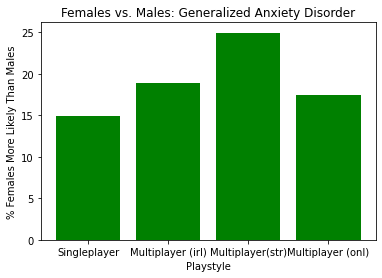

In [53]:
plt.bar(USAGADDF_df['Playstyle'], USAGADDF_df['% Greater'], color = "green")
plt.title("Females vs. Males: Generalized Anxiety Disorder")
plt.xlabel("Playstyle")
plt.ylabel("% Females More Likely Than Males")
plt.show()

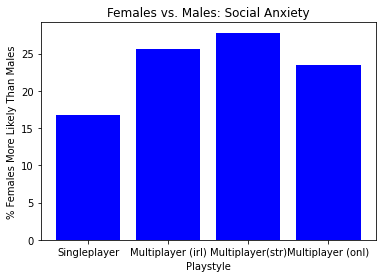

In [54]:
plt.bar(USASPINDF_df['Playstyle'], USASPINDF_df['% Greater'], color = "blue")
plt.title("Females vs. Males: Social Anxiety")
plt.xlabel("Playstyle")
plt.ylabel("% Females More Likely Than Males")
plt.show()